In [15]:
import h5py
import matplotlib.pyplot as plt

from core import *

In [89]:
data = h5py.File("data/out_poisson/poisson.h5")

geometry = torch.tensor(data["/Mesh/mesh/geometry"][...], dtype=torch.float64)
topology = torch.tensor(data["/Mesh/mesh/topology"][...], dtype=torch.int32)
func = torch.tensor(data["/Function/f/0"][...], dtype=torch.float64)

print(geometry.shape)
print(topology.shape)
print(func.shape)

torch.Size([81, 2])
torch.Size([128, 3])
torch.Size([81, 1])


In [131]:
def topology_to_edges(topology):
    edges = torch.cat((topology[:, 0:2],
                       topology[:, 1:3],
                       torch.stack((topology[:, 2], topology[:, 0]), dim=1))).to(torch.int32)
    
    senders = torch.min(edges, dim=1).values
    receivers = torch.max(edges, dim=1).values

    packed_edges = torch.stack([senders, receivers], dim=1).view(torch.int64)
    unique_edges = torch.unique(packed_edges).view(torch.int32).view(-1, 2)
    senders, receivers = torch.unbind(unique_edges, dim=1)

    return (torch.cat([senders, receivers], dim=0),
            torch.cat([receivers, senders], dim=0))
    

In [132]:
senders, receivers = topology_to_edges(topology)

In [135]:
torch.stack([senders, receivers], dim=1).shape

torch.Size([416, 2])

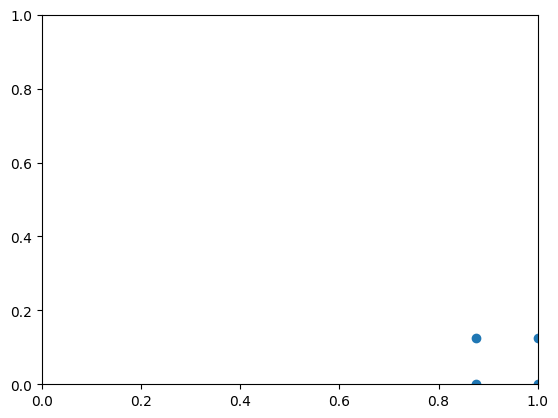

In [90]:
plt.figure()

n = 4

plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
plt.scatter(geometry[0:n, 0], geometry[0:n, 1])
plt.show()


In [92]:
edges = torch.cat((topology[:, 0:2],
                   topology[:, 1:3],
                   torch.stack((topology[:, 2], topology[:, 0]), dim=1))).to(torch.int32)


In [93]:
senders = torch.min(edges, dim=1).values
receivers = torch.max(edges, dim=1).values

In [118]:
packed_edges = torch.stack([senders, receivers], dim=1).view(torch.int64)
unique_edges = torch.unique(packed_edges).view(torch.int32).view(-1, 2)

In [127]:
unique_edges[:10]
senders, receivers = torch.unbind(unique_edges, dim=1)